In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load

In [31]:
data=pd.read_csv("iris.csv").drop("Id", axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
iris_data = data.iloc[:, :-1]
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Functions for Calculating Correlation Coefficient and Correlation Matrix

In [33]:
def correlation_coeff(x, y):
    x_mean, y_mean = np.mean(x), np.mean(y)
    x_std, y_std = np.std(x), np.std(y)
    n = len(x)
    return np.sum((x-x_mean)*(y-y_mean)) / (n*x_std*y_std)

def correlation_matrix(data):
    n = len(data.columns)
    corr = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            corr[i, j] = correlation_coeff(data[data.columns[i]], data[data.columns[j]])
    return pd.DataFrame(corr, columns=data.columns, index=data.columns)
    

The 'correlation_coeff' function calculates the Pearson correlation coefficient between arrays 'x' and 'y'. It standardizes both arrays by subtracting their means and dividing by their standard deviations, then computes the sum of their element-wise product divided by the product of their lengths and standard deviations.

The 'correlation_matrix' function computes the correlation coefficients between all pairs of columns in the input DataFrame 'data'. It initializes an empty correlation matrix, then iterates through column indices, calculating the correlation coefficients using 'correlation_coeff' function and populates the matrix. The resulting matrix is returned as a DataFrame with column and index labels corresponding to the columns of the input data.

In [34]:
corr_matrix = correlation_matrix(iris_data)
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


# Heat Map

<Axes: >

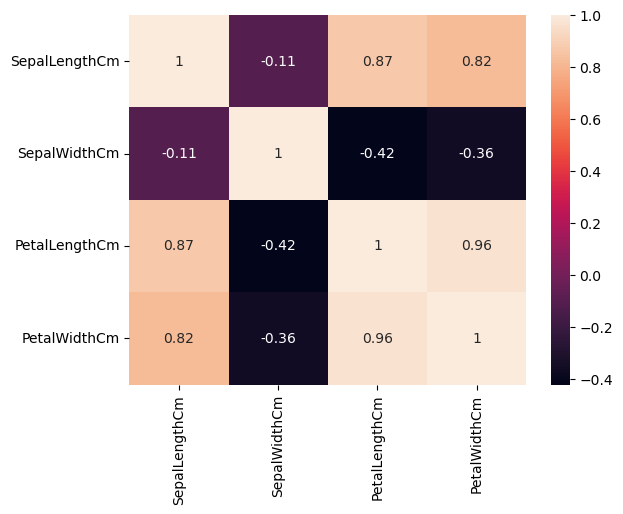

In [35]:
sns.heatmap(corr_matrix, annot=True)

In [36]:
print("High correlated features")
pos,neg = [], []
for i in range(len(corr_matrix)):
    for j in range(i+1,len(corr_matrix)):
        value = round(corr_matrix.iloc[i,j],2)
        if value>0.8:
            pos.append(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]} : {value}")
        elif value < -0.4:
            neg.append(f"{corr_matrix.columns[i]} - {corr_matrix.columns[j]} : {value}")
print("Positive correlation")
for i in pos:
    print(i)
print("\nNegative correlation")
for i in neg:
    print(i)

High correlated features
Positive correlation
SepalLengthCm - PetalLengthCm : 0.87
SepalLengthCm - PetalWidthCm : 0.82
PetalLengthCm - PetalWidthCm : 0.96

Negative correlation
SepalWidthCm - PetalLengthCm : -0.42


This code snippet identifies highly correlated and negatively correlated pairs of features based on the correlation matrix. It iterates through the upper triangular part of the matrix, rounding the correlation values and categorizing pairs with a correlation greater than 0.8 as "High correlated features" (stored in the 'pos' list), and pairs with correlation less than -0.4 as "Negative correlated features" (stored in the 'neg' list). Finally, it prints the identified pairs and their correlation values in a readable format.